In [7]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import cv2
from tensorflow.keras.models import load_model

# 1. Data collection & splitting

In [8]:
mnist = tf.keras.datasets.mnist
# training & testing sample
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train.shape

(60000, 28, 28)

# 2. Normalization

In [9]:
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)

# 3. Resizing the dataset for convolution

In [10]:
imgSize = 28
x_trainr = np.array(x_train).reshape(-1, imgSize, imgSize, 1) # -1 corresponds to maximum, here it is 60000
x_testr = np.array(x_test).reshape(-1, imgSize, imgSize, 1) # & 10000
print("Training Samples dimension", x_trainr.shape)
print("Testing Samples dimension", x_testr.shape)

Training Samples dimension (60000, 28, 28, 1)
Testing Samples dimension (10000, 28, 28, 1)


# 4. Creating Deep Neural Network

In [11]:
model = Sequential()

# 1st convolution layer
model.add(Conv2D(64, (3,3), input_shape = x_trainr.shape[1:]))
model.add(Activation("relu")) # activation function
model.add(MaxPooling2D(pool_size = (2,2))) 

# 2nd convolution layer
model.add(Conv2D(64, (3,3), input_shape = x_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

# 3rd convolution layer
model.add(Conv2D(64, (3,3), input_shape = x_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

# fully connected layer 1
model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

# fully connected layer 2
model.add(Dense(32))
model.add(Activation("relu"))

# last fully connected layer
model.add(Dense(10))
model.add(Activation("softmax"))

# 5. Model Summary

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 activation (Activation)     (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                   

# 6. Model Compilation

In [13]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# 7. Model Training

In [14]:
model.fit(x_trainr, y_train, epochs = 5, validation_split = 0.3)

Epoch 1/5
1313/1313 [==============================] - 39s 29ms/step - loss: 0.3540 - accuracy: 0.8876 - val_loss: 0.1263 - val_accuracy: 0.9623
Epoch 2/5
1313/1313 [==============================] - 34s 26ms/step - loss: 0.1090 - accuracy: 0.9663 - val_loss: 0.0842 - val_accuracy: 0.9751
Epoch 3/5
1313/1313 [==============================] - 38s 29ms/step - loss: 0.0801 - accuracy: 0.9757 - val_loss: 0.0908 - val_accuracy: 0.9732
Epoch 4/5
1313/1313 [==============================] - 34s 26ms/step - loss: 0.0611 - accuracy: 0.9814 - val_loss: 0.0646 - val_accuracy: 0.9807
Epoch 5/5
1313/1313 [==============================] - 33s 25ms/step - loss: 0.0483 - accuracy: 0.9847 - val_loss: 0.0840 - val_accuracy: 0.9761


# 8. Model Evaluation

In [15]:
testLoss, testAccuracy = model.evaluate(x_testr, y_test)
print("Test Loss on 10k test samples = ", testLoss)
print("Validation Accuracy on 10k test samples = ", testAccuracy)

313/313 [==============================] - 3s 8ms/step - loss: 0.0768 - accuracy: 0.9785
Test Loss on 10k test samples =  0.07677127420902252
Validation Accuracy on 10k test samples =  0.9785000085830688


# 9. Saving the model

In [16]:
model.save("TrainedModel.h5")

C:\Users\ajGau\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# 10. Predicting from test dataset sample

In [17]:
predictions = model.predict(x_testr)

313/313 [==============================] - 3s 8ms/step


In [18]:
print(predictions)

[[1.4832107e-09 1.6410822e-07 2.6034375e-06 ... 9.9999714e-01
  1.3334042e-09 1.7604900e-07]
 [3.0246376e-05 5.2442783e-07 9.9996030e-01 ... 3.4450295e-07
  5.9300680e-07 1.7931050e-07]
 [9.3076678e-06 9.9991226e-01 5.8010469e-06 ... 5.1716546e-05
  1.3967796e-06 4.9770879e-06]
 ...
 [1.5975800e-07 5.7413172e-07 3.3976705e-06 ... 3.4229638e-06
  5.8326177e-06 1.1733988e-04]
 [7.9744808e-05 1.2906539e-09 7.8291613e-08 ... 5.0396922e-09
  5.0533104e-06 1.0171613e-05]
 [1.6771790e-05 1.7616010e-06 7.9272584e-05 ... 9.7710977e-09
  3.3437254e-06 7.6974203e-07]]


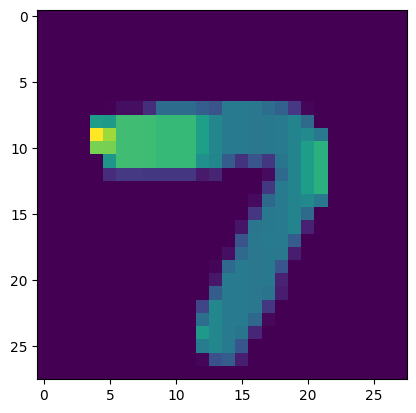

Predicted Digit = 7


In [56]:
import random
indx = random.randint(0, 999)
plt.imshow(x_testr[indx])
plt.show()
prediction = np.argmax(predictions[indx]) # prediction / label
print(f"Predicted Digit = {prediction}")

# 11. User input predicition

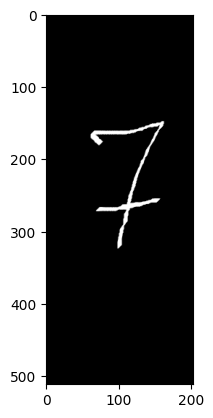

(512, 204, 3)

In [49]:
ipimg = cv2.imread("img22.png")
plt.imshow(ipimg)
plt.show()
ipimg.shape

# Input image Pre-Processing

In [50]:
# 1. Resize
ipimg = cv2.resize(ipimg, (28, 28), interpolation = cv2.INTER_AREA)
ipimg.shape

(28, 28, 3)

In [51]:
# 2. Grayscale
ipimg = cv2.cvtColor(ipimg, cv2.COLOR_BGR2GRAY)
ipimg.shape

(28, 28)

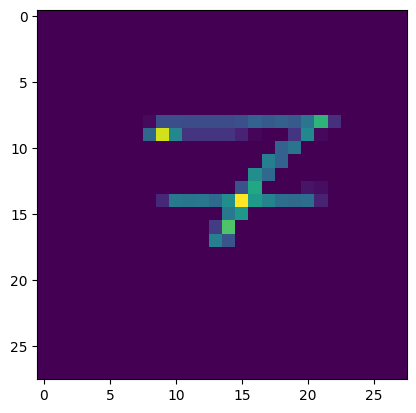

In [52]:
plt.imshow(ipimg)

In [53]:
# 3. Normalization
ipimg = tf.keras.utils.normalize(ipimg, axis = 1)

In [54]:
# 4. Reshape
ipimg = np.array(ipimg).reshape(-1, 28, 28, 1)
ipimg.shape

(1, 28, 28, 1)

# 12. Digit Prediction

In [55]:
prediction = model.predict(ipimg)
print(f"Predicted Digit = {np.argmax(prediction)}")

1/1 [==============================] - 0s 18ms/step
Predicted Digit = 7
